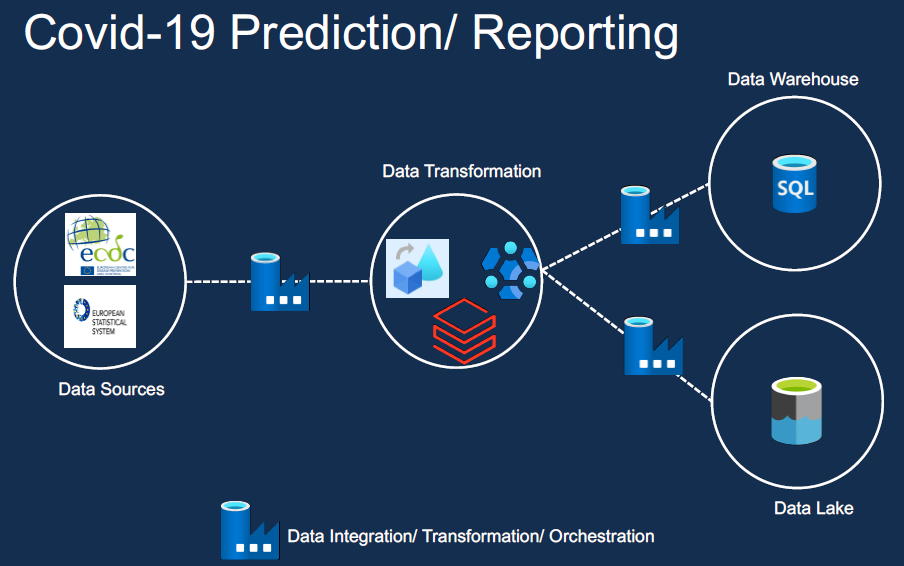

In [4]:
from IPython.display import Image
Image('./img/adf1.png')

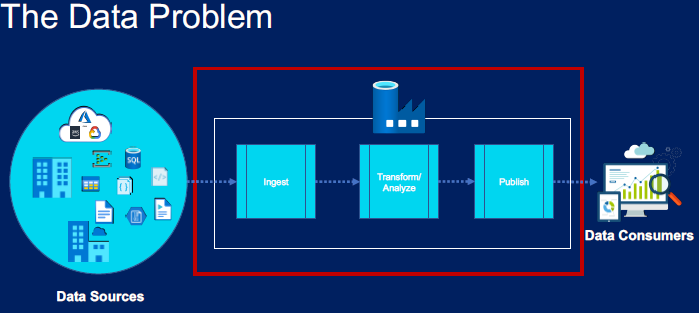

In [5]:
from IPython.display import Image
Image('./img/adf2.png')

## Azure Data Factory Overview
#### What is Azure Data Factory
- A fully managed, serverless data integration solution for ingesting,
preparing and transforming all of your data at scale.

#### 🚧 The Problem ADF Solves
- Businesses generate enormous volumes of data daily.
- Data comes from various sources: multi-cloud, on-premises, SaaS apps.
- Arrival frequency varies: near-real-time or scheduled batch loads.
- Data types include structured, semi-structured, and unstructured formats.
- Quick and consistent ingestion + processing is essential to gain insights.
- Traditional data integration tools struggle due to:
  - Lack of connectors
  - Poor scalability
  - High management overhead


#### ✅ Azure Data Factory Capabilities

##### 🔌 Data Ingestion
- Connectors for 90+ sources (and growing)
  - SaaS: Salesforce, Office 365
  - Cloud: Amazon S3, Google Cloud Storage
  - On-prem: SQL Server, Oracle, SAP

##### 🔄 Data Transformation
- Built-in transformation options (code-free interface)
- If complex logic needed: use **Azure Databricks** or **HDInsight**
- ADF supports orchestration of external Spark jobs

##### 🤖 ML Integration
- Orchestrate ML pipelines in Azure ML or Databricks

##### 📊 Dashboard Publishing
- Supports Power BI dashboard publishing orchestration

##### 🔁 End-to-End Orchestration
- Control flow, activities, dependencies, and scheduling
- Built-in Monitoring & Alerting

#### 🧩 Definition Breakdown

| Term | Meaning |
|------|---------|
| **Fully Managed** | No need to manage VMs, OS, scaling — Microsoft handles it |
| **Serverless** | Auto-scale compute on demand without provisioning |
| **Data Integration** | Pull from diverse sources — cloud, on-prem, SaaS |
| **Ingest, Prepare, Transform** | End-to-end pipeline flow |
| **At Scale** | Scales elastically for enterprise-grade workloads |


#### Project Overview
##### 🔹 Project Introduction
In this course, we will build a data platform to support:
1. Prediction of COVID-19 spread using machine learning (handled by data scientists later).
2. Reporting COVID-19 trends using a BI tool like Power BI.

We will develop a data ingestion, transformation, and orchestration pipeline using Azure Data Factory (ADF) with a focus on European Union (EU) and UK data sources.

🔹 Data Sources
- COVID-19 Cases Data: From ECDC (European Centre for Disease Prevention and Control).
- Population Data: From Eurostat.
    - Stored in Azure Blob Storage (simulating internal shared datasets).

##### Solution Architectur overview

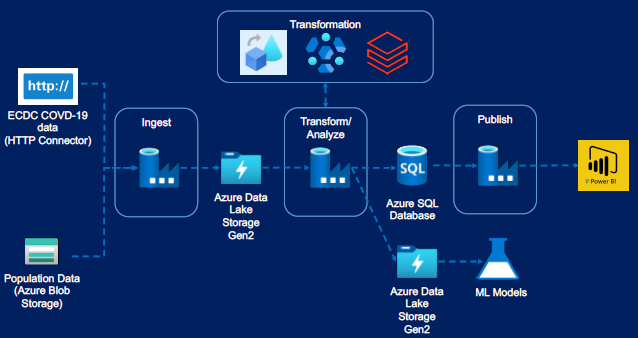

In [11]:
from IPython.display import Image
Image('./img/adf3.png')

##### 🔹 Technology Choices
| Component                    | Technology Used                   | Reason                                                        |
| ---------------------------- | --------------------------------- | ------------------------------------------------------------- |
| Orchestration                | Azure Data Factory                | Rich connectors, visual pipeline creation, hybrid support     |
| Ingestion                    | ADF HTTP, Blob connectors         | Covers both web and internal shared file sources              |
| Transformation               | Data Flows, HDInsight, Databricks | To showcase various transformation options in Spark ecosystem |
| Data Storage (Raw & Curated) | Azure Data Lake Storage Gen2      | Scalable, secure, enterprise-grade data lake                  |
| Reporting Store              | Azure SQL Database                | Easy to query; using instead of Synapse for simplicity        |
| Visualization                | Power BI                          | Rich visualization tool; minor focus here                     |

##### 🔹 Transformation Technologies Compared
| Tool          | Type              | Strengths                               | Limitations                      |
| ------------- | ----------------- | --------------------------------------- | -------------------------------- |
| ADF Data Flow | Code-free         | Easy to use, good for medium complexity | Not ideal for very complex logic |
| HDInsight     | Spark/Hive/Pig    | Flexible, legacy big data tool          | Heavier to manage                |
| Databricks    | Spark + Notebooks | Collaborative, powerful, scalable       | Requires coding                  |

##### 🔹 Data Storage Details
- Blob Storage: For storing curated population data from Eurostat.
- ADLS Gen2: Main data lake for raw and transformed COVID datasets.
- SQL DB: For reporting use cases, small to medium scale.
- Synapse Analytics (Optional): Use if dataset grows large.

##### 🔹 Power BI Reporting
We will briefly connect Power BI to Azure SQL DB to build a COVID-19 trend dashboard. The focus remains on data pipeline, not deep Power BI.

Lecture: Project Overview
- ECDC Website for Covid-19 Data - https://www.ecdc.europa.eu/en/covid-19/data
- Euro Stat Website for Population Data - https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/tps00010.tsv.gz

Lecture: Azure Storage Solutions
- Introduction to Azure Storage services - https://docs.microsoft.com/en-us/azure/storage/common/storage-introduction
- Azure SQL Database - https://docs.microsoft.com/en-us/azure/azure-sql/database/sql-database-paas-overview
- Azure Synapse Analytics - https://docs.microsoft.com/en-us/azure/synapse-analytics/overview-what-is
- Azure Cosmos DB - https://docs.microsoft.com/en-us/azure/cosmos-db/introduction
- Azure Data Lake Storage Gen2 - https://docs.microsoft.com/en-us/azure/storage/blobs/data-lake-storage-introduction



## 🏗️ Creating a Data Factory Resource via Azure Portal

##### 🔹 Step 1: Navigate to Azure Portal

- Open [https://portal.azure.com](https://portal.azure.com)
- Click the **☰ menu (top-left)** → **Create a resource**
- In the **Marketplace**, search for **Data Factory**
- Click **Create**

##### 🔹 Step 2: Fill Out Data Factory Form

| Field | Value |
|-------|-------|
| **Subscription** | Your active subscription (e.g., Free Trial) |
| **Resource Group** | `covid-reporting-rg` *(create new)* |
| **Region** | Closest to you (e.g., UK South) |
| **Name** | `covid-reporting-adf` |
| **Version** | V2 (V1 is deprecated) |

Click **Next** to continue to Git configuration.

##### 🔹 Step 3: Git Configuration

- Choose **Configure Git later** (we will not integrate Git in this tutorial).
- Click **Next** to move to **Networking**.
- Accept default networking settings.
- Click **Next** for **Tags** → (Skip or add optional tags)
- Click **Review + Create**.
- Once validation passes, click **Create**.

##### 🔹 Step 4: Post Deployment

- Once deployment finishes (~a few seconds), click **Go to Resource**.
- You’ll see options like:
  - **Access Control (IAM)**
  - **Networking**
  - **Monitoring**
- The main entry point is **Author & Monitor** → This opens ADF Studio.
- Inside ADF Studio:
  - **Author**: Build pipelines
  - **Monitor**: View runs, trigger history
  - **Manage**: Linked services, triggers, etc.

> 📘 Tip: Visit documentation directly using **"Documentation" link** inside portal.

##### 📌 Step 5: Pin Resource to Dashboard

- Click the **📌 Pin icon** to pin your Data Factory to a dashboard
- Create a new dashboard named: `Covid Reporting Project`
- Click **Create and Pin**
- Access via: ☰ → **Dashboard** → Choose `Covid Reporting Project`
- All related resources will be pinned here for easy access 🎯

## 💾 Creating an Azure Storage Account via Azure Portal
##### 🔹 Step 1: Go to Azure Portal
- Open [https://portal.azure.com](https://portal.azure.com)
- Click the **☰ menu (top-left)** → **Create a resource**
- In the **Marketplace**, search for **Storage Account**
- Click **Create**

##### 🔹 Step 2: Configure the Storage Account

| Field | Value |
|-------|-------|
| **Subscription** | Pay-As-You-Go (or your active one) |
| **Resource Group** | `covid-reporting-rg` |
| **Storage Account Name** | `covidreportingsa` *(lowercase, 3–24 characters)* |
| **Region** | Closest to you (e.g., UK South) |
| **Performance** | Standard *(HDD-backed, cost-effective)* |
| **Replication** | LRS *(Locally Redundant Storage – basic & cheapest)* |

> 💡 **Naming Tip**: Use meaningful names. Example: `covidreportingsa`
- `covidreporting` → project name
- `sa` → storage account

Click **Next** through Advanced, Networking, Data Protection, and Encryption.
Accept **default settings** for all.
Skip **Tags** or use them optionally.
Click **Review + Create** → After validation → Click **Create**

##### 🔹 Step 3: Explore the Storage Account
- Once deployment completes, click **Go to Resource**
- You’ll see sections like:
  - **Access Control (IAM)**: Assign RBAC roles
  - **Access Keys**: Two keys auto-generated (`key1`, `key2`) → Can be used in apps or rotated
  - **Data storage**:
    - **Containers** (for blobs)
    - **File shares** (for SMB)
    - **Queues** and **Tables**
- You can use **Storage Browser** (Web UI) or download **Azure Storage Explorer (Desktop)** for advanced operations *(next lesson)*

##### 📌 Step 4: Pin Storage Account to Dashboard
- Click 📌 **Pin** icon
- Add to existing dashboard: `Covid Reporting Project`
- Navigate via **☰ → Dashboard → Covid Reporting Project** to quickly access all resources

## 🗃️ Creating an Azure SQL Database via Azure Portal
##### 1. **Navigate to Azure Portal**
- Go to [https://portal.azure.com](https://portal.azure.com)
- Click on **Create a resource** from the top-left menu
- Search for **SQL Database** and click **Create**

##### 2. **Basic Settings**
- **Subscription**: Select your active subscription (e.g., Pay-As-You-Go)
- **Resource Group**: Use existing `covid-reporting-rg`
- **Database Name**: `covid-db`
- **Server**: Click **Create new**
  - Name: `covid-srv`
  - Region: Closest to your location (e.g., UK South)
  - Auth: SQL Authentication
    - Username: `adm`
    - Password: `********`

##### 3. **Configure Compute + Storage**
- **Service Tier**: Basic (DTU-based)
- **Cost**: ~£4.56/month (subject to local currency)
- **Storage**: 2 GB
- **Tier Summary**:
  - DTU = Database Transaction Unit (includes CPU, Memory, IOPS)
 
##### 4. **Networking**
- **Connectivity**: Public endpoint
- **Allow Azure Services**: Yes
- **Add Current IP to Firewall**: Yes

##### 5. **Backup**
- Choose **Locally Redundant Storage (LRS)** for lower cost

##### 6. **Review + Create**
- Validate settings
- Click **Create**
- Deployment takes ~10 minutes

##### ✅ Navigate to SQL DB
- Click **Go to Resource**
- Confirm:
  - DB Name: `covid-db`
  - Server: `covid-srv`
  - Pricing Tier: Basic
  - Storage: 2 GB

##### 🛠️ Query Editor
- Go to **Query Editor** under the SQL DB resource
- Authenticate with SQL credentials
- Example Query:

In [10]:
# SELECT * FROM sys.objects;

##### 🔧 Recommended Tools for SQL Work
- **Azure Data Studio** (Cross-platform)
- **SQL Server Management Studio (SSMS)** (Windows only)

- https://azure.microsoft.com/en-us/products/storage/storage-explorer
- https://learn.microsoft.com/en-us/azure-data-studio/download-azure-data-studio?view=sql-server-ver16%5C&tabs=win-install%2Cwin-user-install%2Credhat-install%2Cwindows-uninstall%2Credhat-uninstall

## 4. Data Ingestion from Azure blod storage to Azure Data Lake(copy activity)

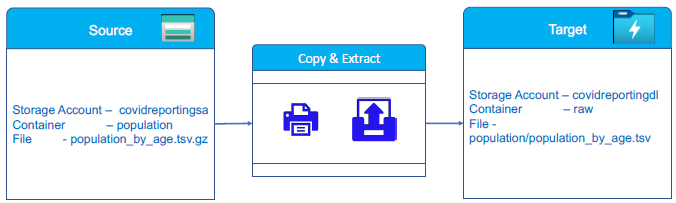

In [12]:
from IPython.display import Image
Image('./img/adf4.png')

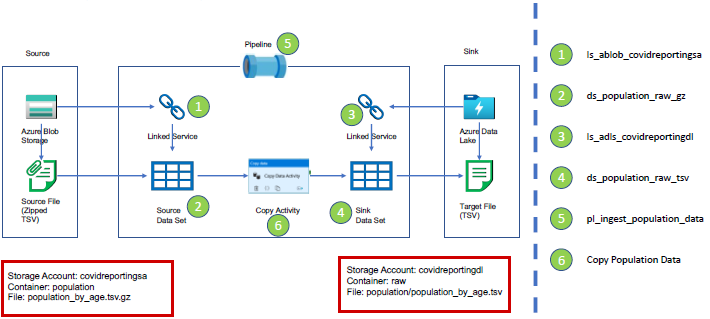

In [14]:
from IPython.display import Image
Image('./img/adf5.png')

#### Step 1. Create Source Container and Upload File

Steps:
1. Go to the **Azure Portal**.
2. Open your **Storage Account** (`covidreportingsa`) from the Dashboard or All Resources.
3. Navigate to `Storage browser` → `Blob containers`.
4. Click **+ Container**, name it `population`, and set access level to `Private`.
5. Click into the container `population` and click **Upload**.
6. Browse and upload the file `population_by_age.tsv.gz`.

##### 2. Create Sink Container (Azure Data Lake)

Steps:
1. Go back to Dashboard → Open your Data Lake Storage Account (`covidreportingdl`).
2. Navigate to `Storage browser` → `Blob containers`.
3. Click **+ Container**, name it `raw`.
4. Set access level to `Private` and click **Create**.

#### Step 2: Create Linked Services in Azure Data Factory
Navigate to **Manage** (wrench icon on the left side) → **Linked Services** → **New**:

##### 1. Azure Blob Storage Linked Service(ls_ablob_covidreportingsa)
- Type: Azure Blob Storage
- Authentication: Account Key
- Connection Method: Use subscription to locate storage
- Storage Account: `covidreportingsa`
- Test Connection → Create

##### 2. Azure Data Lake Gen2 Linked Service(ls_adls_covidreportingdl) 
- Type: Azure Data Lake Gen2
- Authentication: Account Key
- Storage Account: `covidreportingdl`
- Test Connection → Create

#### Step 3: Create Datasets
Navigate to **Author** (pencil icon) → **Datasets** → **New Dataset**.

##### 1. Source Dataset (Blob Storage)
- Format: DelimitedText
- Name: `ds_blob_population_gz`
- Linked Service: `ls_ablob_covidreportingsa`
- File Path: `/population/population_by_age.tsv.gz`
- Compression: GZip (Optimal)
- Column Delimiter: Tab (`\t`)
- First row as header: Enabled

> You can use "Preview Data" to confirm headers and schema.

##### 2. Sink Dataset (Data Lake Gen2)
- Format: DelimitedText
- Name: `ds_adls_population`
- Linked Service: `ls_adls_covidreportingdl`
- File Path: `/raw/population_by_age.tsv`
- Compression: None
- Column Delimiter: Tab (`\t`)
- First row as header: Enabled

> No preview available as file doesn't exist yet.

#### Step 4: Validate and Publish
##### Validate Objects
Click on **Validate All** to check for issues in Linked Services or Datasets.

##### Publish Changes
Click on **Publish All** to save changes to the Data Factory.
Until you publish, your datasets and pipelines exist only temporarily in the UI.

##### 1. Create a New Pipeline
- Go to **Author** tab in ADF Studio.
- Click on the three dots next to Pipelines → **New Pipeline**.
- On the right, name your pipeline and provide an optional description.
- Set **Concurrency** to `1` (or more if parallel runs are needed).

##### 2. Add a Copy Data Activity
- Expand **Move & Transform** in the Activities pane.
- Drag **Copy data** to the central canvas.
- Select the activity to configure:
  - Name the activity (e.g., `CopyRawToLake`).
  - Set timeout to `5 minutes`.
  - Retry: `0` (or higher with interval).
  - Secure Output/Input: Enable if sensitive data is involved.

##### 3. Configure the Source
- Click the **Source** tab on the activity.
- Choose the dataset (e.g., `population_by_age_gzipped`).
- Advanced options can be skipped unless required.

##### 4. Configure the Sink
- Click the **Sink** tab.
- Choose the output dataset (e.g., Data Lake Storage).
- Ensure the folder path is correctly set (e.g., `raw/population/`).

##### 5. Mapping (Optional)
- Use **Mapping** only if you're transforming field names/structures.
- If simply copying files (binary/flat), skip this step.

##### 6. Validate and Debug
- Click **Validate All** to check for errors.
- Click **Debug** to test-run the pipeline.
- Check **Output** pane → view **Details** tab for runtime and file info.

##### 7. Verify Output in Azure Storage Explorer
- Open **Azure Storage Explorer**.
- Login with Azure credentials → find the **sink storage account**.
- Navigate to `raw/population/` → download the file.
- Check contents in any text editor (e.g., VS Code, Notepad++).

##### 8. Publish the Pipeline
- Click **Publish All** in the top bar to commit changes to ADF.
- Your pipeline is now saved and ready to trigger manually or via schedule.

## 📂 Real-World Scenario: Using Validation Activity in Azure Data Factory
In real-world pipelines, we often face unpredictable data arrival times. Let's walk through how to make our pipeline production-ready by using **Validation activity** to check whether a file has arrived before proceeding.

##### 🔔 Scenario
- Source data is dropped daily by an upstream system.
- We don't know *when* the file will arrive during the day.
- As soon as the file is available, we want to process it.
- We'll achieve this using **Validation Activity** in Azure Data Factory (ADF).

##### 🛠️ Steps in Azure Data Factory
##### Step 1: Schedule Pipeline
- Trigger the pipeline to run **daily at midnight**.

##### Step 2: Use Validation Activity
- From **General** category in ADF Activities → drag **Validation** onto canvas.
- Rename the activity: `check_if_file_exists`

##### Step 3: Configure Settings
**Dataset**: Select the expected dataset (e.g. GZIP file)

**Timeout**: `1.00:00:00` (i.e., 1 day)
- This is the **total time to wait** for the file to arrive.

**Sleep**: `600` (i.e., 10 minutes)
- How frequently the pipeline checks for the file.

**Minimum Size**: `1024` bytes (optional)
- Ensures file is fully written (not zero-byte or mid-transfer).

##### Step 4: Chain Activities
- Drag the green arrow ("Success") from validation activity to the next activity (e.g., **Copy Data**).
- You can also configure actions on **Failure**, like sending an email.

##### 🧪 Debugging Scenarios
**Case 1: File is missing**
- Set timeout = 30 seconds
- Sleep = 10 seconds
- If file does not appear → pipeline fails with `Timeout` error.

**Case 2: File appears during wait**
- Set timeout = 2 minutes
- Sleep = 10 seconds
- Upload file during execution → pipeline proceeds successfully.

🔗 Refer to [Microsoft Docs - Validation Activity](https://learn.microsoft.com/en-us/azure/data-factory/control-flow-validation-activity) for up-to-date details.

## ADF File Validation Pipeline

This notebook documents the setup for validating a file using ADF activities like `Get Metadata`, `If Condition`, and `Web Activity`.

##### Step 1: Get File Metadata
Use the `Get Metadata` activity to extract file-level properties.


#### Pseudocode: ADF metadata activity configuration
{
  "name": "Get File Metadata",
  "type": "GetMetadata",
  "dataset": "InputGzipDataset",
  "fieldList": [
    "exists",
    "size",
    "columnCount"
  ]
}

##### Step 2: Conditional Check
Use `If Condition` activity to verify if the column count is 13.


#### Pseudocode: If Condition expression in ADF
{
  "name": "If Column Count Matches",
  "type": "IfCondition",
  "expression": {
    "value": "@equals(activity('Get File Metadata').output.columnCount, 13)"
  },
  "ifTrueActivities": ["Copy Data Activity"],
  "ifFalseActivities": ["Send Email Web Activity"]
}

##### Step 3: Copy Activity
The copy activity runs only if the condition is met.


##### Pseudocode: Copy activity under IfCondition -> True
{
  "name": "Copy Data to DataLake",
  "type": "Copy",
  "inputs": ["InputGzipDataset"],
  "outputs": ["SinkDataset"]
}

##### Step 4: Web Activity for Notification
Sends an email or triggers Logic App if file is invalid.


##### Pseudocode: Web Activity on failure
{
  "name": "Send Email",
  "type": "WebActivity",
  "method": "POST",
  "url": "https://dummy-url.com/notify",
  "body": {
    "message": "File validation failed. Column count mismatch."
  }
}

##### Final Step: Publish Pipeline
Ensure to validate and publish your pipeline after making changes.

## Introduction

In this lesson, we are going to discuss the third scenario — moving a file instead of copying it by using a Copy Activity followed by a Delete Activity in Azure Data Factory (ADF).

##### Move Operation Using Delete Activity

ADF does not have a native 'Move' activity. However, a move can be achieved by chaining a Delete Activity after a successful Copy Activity.

Steps to achieve this:
1. Add a Delete Activity under the 'If Condition' for the true case.
2. Set the dataset for the Delete Activity.
3. Configure options like recursive delete or logging, if required.
4. Link the Copy Activity to the Delete Activity using success dependency.

##### Debug and Verification

Run a debug of the pipeline and confirm that:
- The file is successfully copied.
- The file is deleted from the source after the copy.
- All activities show a successful status in Monitor.

##### Introduction to Triggers

ADF offers three types of triggers:
1. Schedule Trigger
2. Tumbling Window Trigger
3. Event-Based Trigger

Each has specific use-cases:
- Schedule: Runs on a calendar schedule.
- Tumbling Window: Best for fixed time slices.
- Event-Based: Reacts to file creation or deletion in storage.

##### Creating Schedule Trigger

To create a Schedule Trigger:
1. Navigate to Manage > Triggers > New.
2. Choose 'Schedule' type.
3. Define recurrence, times (e.g., 10:00 AM, 2:00 PM), and time zone (UTC).
4. Attach to one or multiple pipelines.

##### Creating Tumbling Window Trigger

Steps:
1. Define a start time (can be in the past).
2. Set recurrence (e.g., hourly, daily).
3. Configure delay, concurrency, retry policy, and optional dependencies.
4. Note: One Tumbling Window Trigger = One Pipeline.

##### Creating Event-Based Trigger

Steps:
1. Select Subscription and Storage Account.
2. Define Container and Blob path or name.
3. Choose trigger condition: Blob Created/Deleted.
4. Register 'Microsoft.EventGrid' Resource Provider in Azure Portal.
5. Activate trigger or save in paused state.


##### Attaching Trigger to Pipeline

To attach:
1. Open pipeline and click 'Add Trigger' > 'New/Edit'.
2. Select the previously created trigger.
3. Publish all changes to enable the trigger.

##### Testing Event Trigger

- After attaching, upload the expected file to the source container.
- ADF will detect the new file and run the pipeline.
- Check execution success in Monitor > Trigger Runs and Pipeline Runs.

##### Monitor Dashboard Overview

- Dashboard shows counts of pipeline/trigger/activity executions.
- Tabs: Pipeline Runs, Trigger Runs, Integration Runtimes.
- Filters: Time, Status, Trigger Type (Schedule, Tumbling, Event).
- Alerts: Can be created for success/failure notifications.
